Employee retention is a crucial challenge for many organizations. By analyzing the factors that impact whether employees stay or leave, we can gain valuable insights. This dataset provides details on various employee attributes, including education, age, experience, and more. Let's explore the data and see what patterns emerge. If you find this notebook helpful, don't forget to upvote!

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
file_path = '/kaggle/input/employee-dataset/Employee.csv'
df = pd.read_csv(file_path)

INITIAL EXPLORATION

In [5]:
# Display the first few rows of the dataset
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


DATA CLEANING AND PREPARATION

In [6]:
# Check for missing values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
# Convert 'EverBenched' to binary
df['EverBenched'] = df['EverBenched'].apply(lambda x: 1 if x == 'Yes' else 0)

EXPLORATORY DATA ANALYSIS

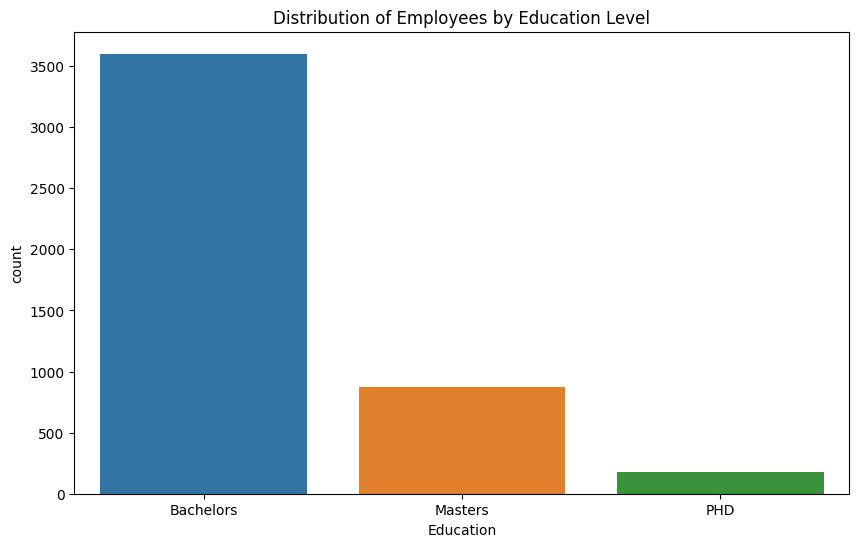

In [10]:
# Distribution of employees by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education')
plt.title('Distribution of Employees by Education Level')
plt.show()

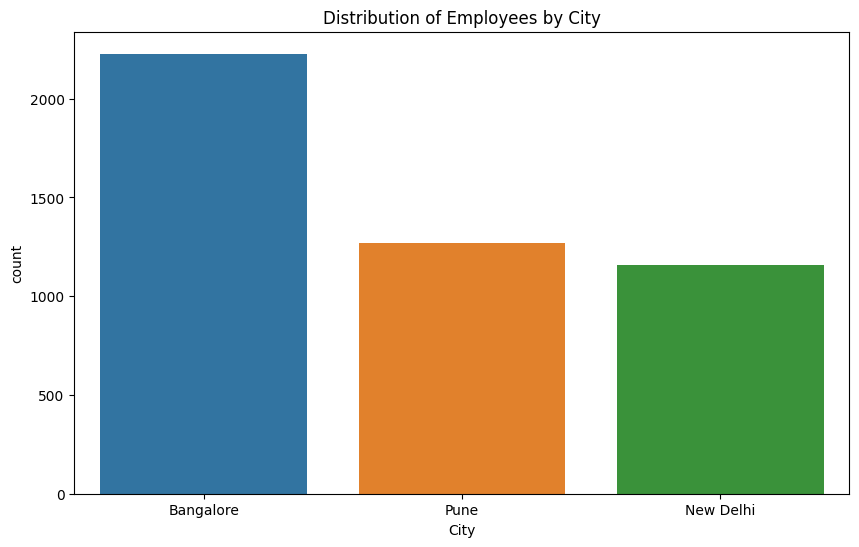

In [11]:
# Distribution of employees by city
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City')
plt.title('Distribution of Employees by City')
plt.show()

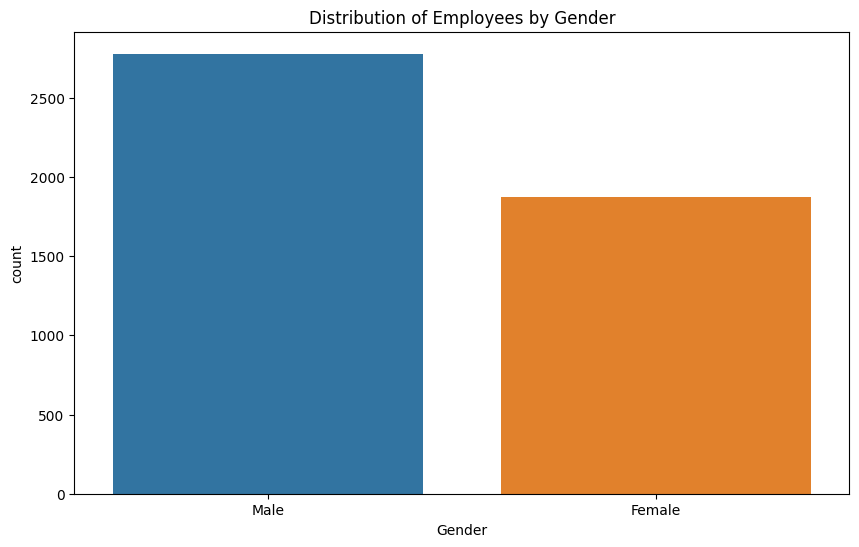

In [12]:
# Distribution of employees by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Employees by Gender')
plt.show()

CORRELATION ANALYSIS

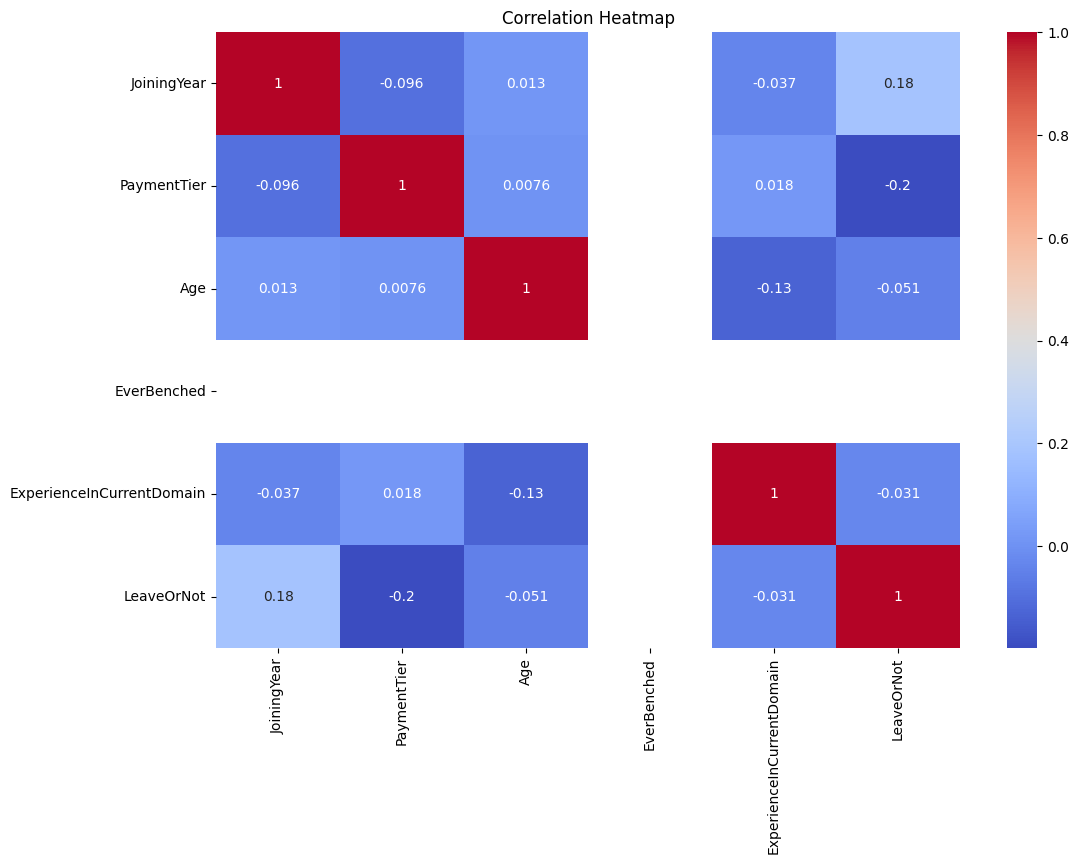

In [13]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PREDICTIVE MODELING

In [14]:
# Prepare data for modeling
X = df.drop('LeaveOrNot', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['LeaveOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.8431232091690545,
 array([[837,  83],
        [136, 340]]),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.88       920\n           1       0.80      0.71      0.76       476\n\n    accuracy                           0.84      1396\n   macro avg       0.83      0.81      0.82      1396\nweighted avg       0.84      0.84      0.84      1396\n')

Our analysis has revealed some intriguing insights into the factors affecting employee retention. While our predictive model has reached a certain level of accuracy, there is always potential for improvement. Future efforts could involve investigating additional features, experimenting with alternative modeling techniques, or incorporating external data sources.